# Problem Statement

Every year a lot of companies hire a number of employees. The companies invest time and money in training those employees, not just this but there are training programs within the companies for their existing employees as well. The aim of these programs is to increase the effectiveness of their employees. But where HR Analytics fit in this? and is it just about improving the performance of employees?

In [128]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import power_transform
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import warnings
warnings.filterwarnings("ignore")

In [42]:
df =pd.read_csv("hr_analytics_employee.csv")
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [43]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

# Data Cleaning

In [45]:
# Label Encoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [46]:
list1 =['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']
for val in list1:
    df[val]= le.fit_transform(df[val].astype(str))

In [47]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,1,884,1,23,2,3,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,0,2,613,1,6,1,3,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,0,2,155,1,4,3,1,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,0,1,1023,2,2,3,3,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [48]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

<AxesSubplot:>

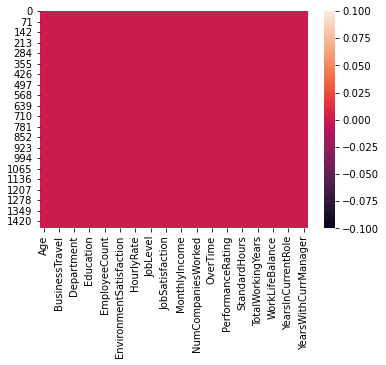

In [51]:
# using Heatmap
sns.heatmap(df.isnull())

There are no null values in dataset, hence data is clean.

In [52]:
df.describe()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,0.161224,1.607483,802.485714,1.260544,9.192517,2.912925,2.247619,1.0,1024.865306,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,0.367863,0.665455,403.509100,0.527792,8.106864,1.024165,1.331369,0.0,602.024335,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,0.000000,0.000000,102.000000,0.000000,1.000000,1.000000,0.000000,1.0,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,1.000000,465.000000,1.000000,2.000000,2.000000,1.000000,1.0,491.250000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.000000,2.000000,802.000000,1.000000,7.000000,3.000000,2.000000,1.0,1020.500000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,0.000000,2.000000,1157.000000,2.000000,14.000000,4.000000,3.000000,1.0,1555.750000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1.000000,2.000000,1499.000000,2.000000,29.000000,5.000000,5.000000,1.0,2068.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [53]:
df.skew()

Age                         0.413286
Attrition                   1.844366
BusinessTravel             -1.439006
DailyRate                  -0.003519
Department                  0.172231
DistanceFromHome            0.958118
Education                  -0.289681
EducationField              0.550371
EmployeeCount               0.000000
EmployeeNumber              0.016574
EnvironmentSatisfaction    -0.321654
Gender                     -0.408665
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
JobRole                    -0.357270
JobSatisfaction            -0.329672
MaritalStatus              -0.152175
MonthlyIncome               1.369817
MonthlyRate                 0.018578
NumCompaniesWorked          1.026471
Over18                      0.000000
OverTime                    0.964489
PercentSalaryHike           0.821128
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StandardHours               0.000000
S

# EDA

<AxesSubplot:>

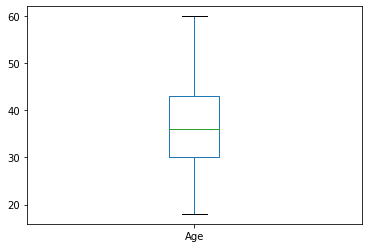

In [54]:
df['Age'].plot.box()

<AxesSubplot:>

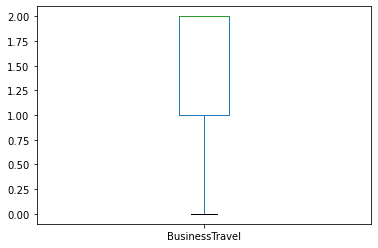

In [55]:
df['BusinessTravel'].plot.box()

<AxesSubplot:>

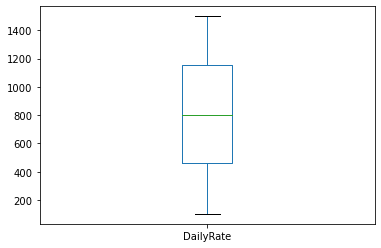

In [56]:
df['DailyRate'].plot.box()

<AxesSubplot:>

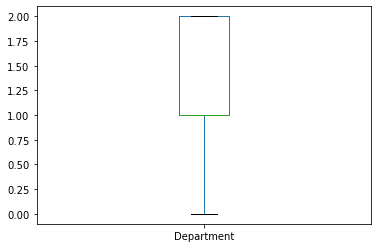

In [57]:
df['Department'].plot.box()

<AxesSubplot:>

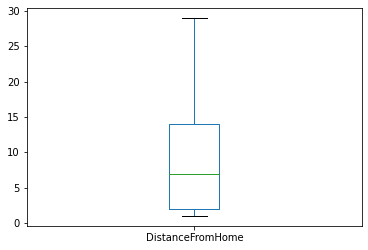

In [58]:
df['DistanceFromHome'].plot.box()

<AxesSubplot:>

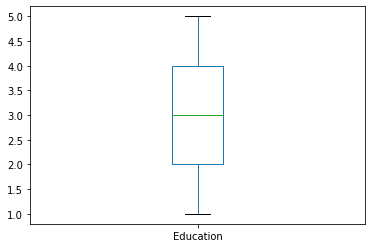

In [59]:
df['Education'].plot.box()

<AxesSubplot:>

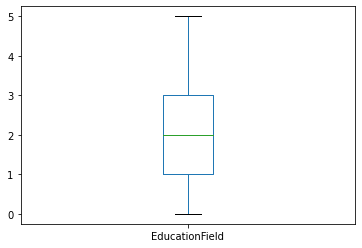

In [61]:
df['EducationField'].plot.box()

<AxesSubplot:>

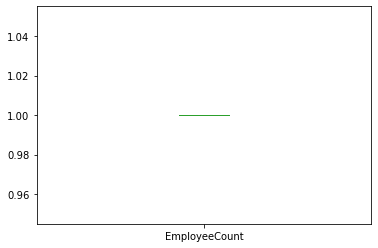

In [62]:
df['EmployeeCount'].plot.box()

<AxesSubplot:>

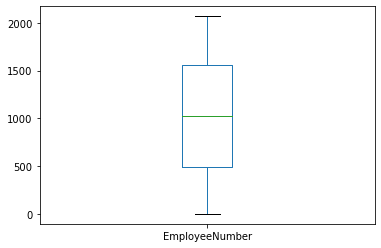

In [63]:
df['EmployeeNumber'].plot.box()

<AxesSubplot:>

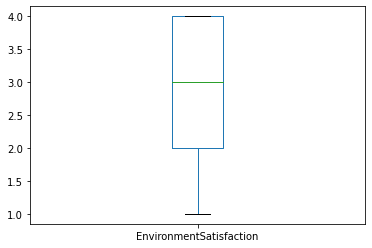

In [64]:
df['EnvironmentSatisfaction'].plot.box()

<AxesSubplot:>

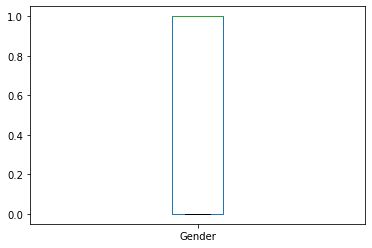

In [65]:
df['Gender'].plot.box()

<AxesSubplot:>

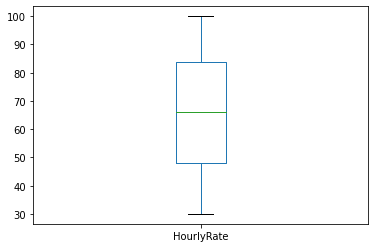

In [66]:
df['HourlyRate'].plot.box()

<AxesSubplot:>

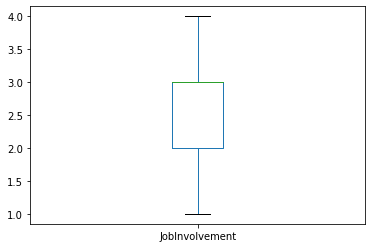

In [68]:
df['JobInvolvement'].plot.box()

<AxesSubplot:>

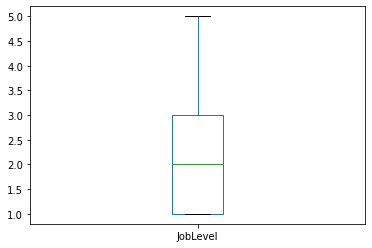

In [69]:
df['JobLevel'].plot.box()

<AxesSubplot:>

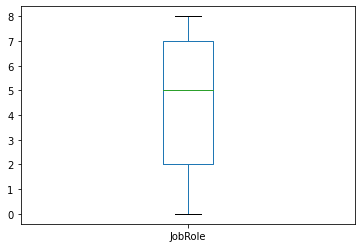

In [70]:
df['JobRole'].plot.box()

<AxesSubplot:>

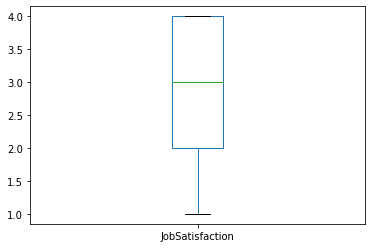

In [71]:
df['JobSatisfaction'].plot.box()

<AxesSubplot:>

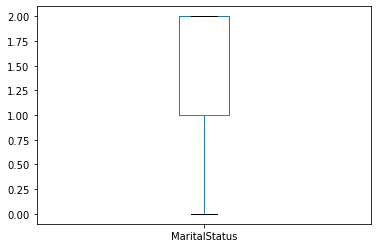

In [72]:
df['MaritalStatus'].plot.box()

<AxesSubplot:>

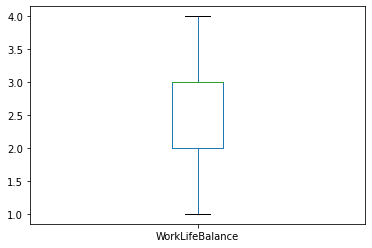

In [73]:
df['WorkLifeBalance'].plot.box()

<AxesSubplot:>

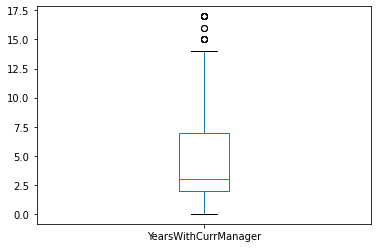

In [74]:
df['YearsWithCurrManager'].plot.box()

# Correlation

In [75]:
df.corr()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,-0.159205,0.024751,0.010661,-0.031882,-0.001686,0.208034,-0.040873,NaN,-0.010145,...,0.053535,NaN,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
Attrition,-0.159205,1.000000,0.000074,-0.056652,0.063991,0.077924,-0.031373,0.026846,NaN,-0.010577,...,-0.045872,NaN,-0.137145,-0.171063,-0.059478,-0.063939,-0.134392,-0.160545,-0.033019,-0.156199
BusinessTravel,0.024751,0.000074,1.000000,-0.004086,-0.009044,-0.024469,0.000757,0.023724,NaN,-0.015578,...,-0.035986,NaN,-0.016727,0.034226,0.015240,-0.011256,-0.014575,-0.011497,-0.032591,-0.022636
DailyRate,0.010661,-0.056652,-0.004086,1.000000,0.007109,-0.004985,-0.016806,0.037709,NaN,-0.050990,...,0.007846,NaN,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
Department,-0.031882,0.063991,-0.009044,0.007109,1.000000,0.017225,0.007996,0.013720,NaN,-0.010895,...,-0.022414,NaN,-0.012193,-0.015762,0.036875,0.026383,0.022920,0.056315,0.040061,0.034282
DistanceFromHome,-0.001686,0.077924,-0.024469,-0.004985,0.017225,1.000000,0.021042,0.002013,NaN,0.032916,...,0.006557,NaN,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.031373,0.000757,-0.016806,0.007996,0.021042,1.000000,-0.039592,NaN,0.042070,...,-0.009118,NaN,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EducationField,-0.040873,0.026846,0.023724,0.037709,0.013720,0.002013,-0.039592,1.000000,NaN,-0.002516,...,-0.004378,NaN,-0.016185,-0.027848,0.049195,0.041191,-0.018692,-0.010506,0.002326,-0.004130
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeNumber,-0.010145,-0.010577,-0.015578,-0.050990,-0.010895,0.032916,0.042070,-0.002516,NaN,1.000000,...,-0.069861,NaN,0.062227,-0.014365,0.023603,0.010309,-0.011240,-0.008416,-0.009019,-0.009197


<AxesSubplot:>

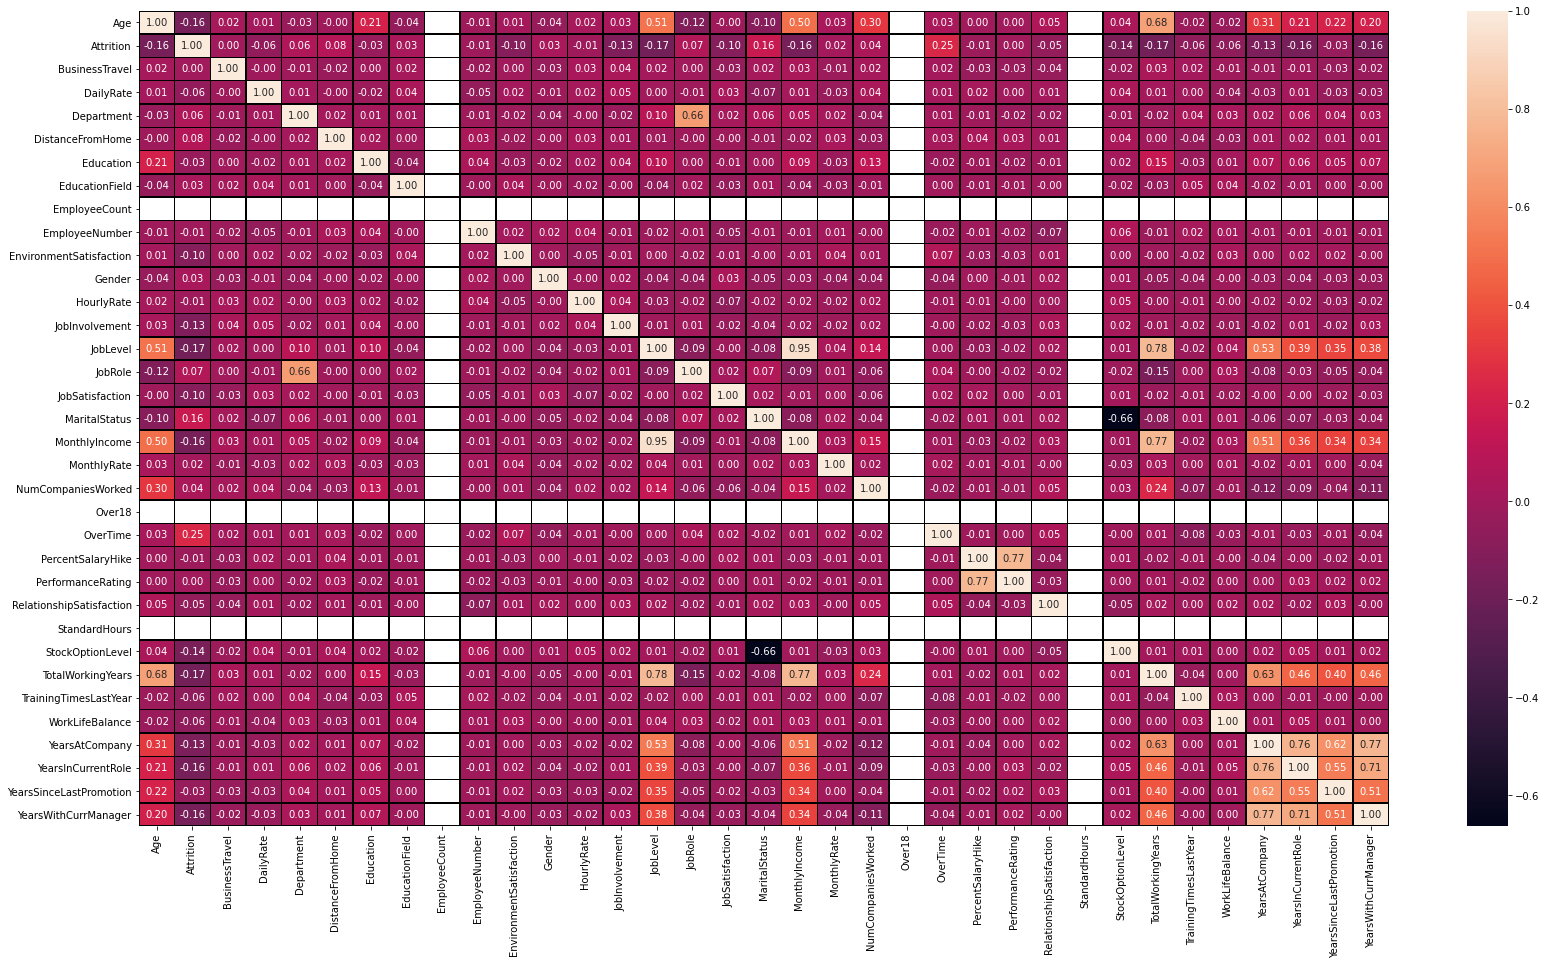

In [81]:
# Correlation using Heatmap

import matplotlib.pyplot as plt
plt.figure(figsize = (28,15))
sns.heatmap(df.corr(), annot = True, linewidth = 0.5, linecolor= 'black', fmt= '.2f')

Outcome of Correlation:
    
    drop those columns which do not have strong bond with target column, hence i.e. yearswithcurrManager, yearsincurrRole, yearsatCompany, TotalWorkingYears, StockOptionLevel, JobInvolvement.

In [88]:
#drop 

df.drop('YearsAtCompany', axis =1, inplace = True)
df.drop('TotalWorkingYears', axis =1, inplace =True)
df.drop('StockOptionLevel', axis =1, inplace =True)
df.drop('JobInvolvement', axis =1, inplace = True)

In [89]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,TrainingTimesLastYear,WorkLifeBalance,YearsInCurrentRole,YearsSinceLastPromotion
0,41,1,2,1102,2,1,2,1,1,1,...,0,1,11,3,1,80,0,1,4,0
1,49,0,1,279,1,8,1,1,1,2,...,0,0,23,4,4,80,3,3,7,1
2,37,1,2,1373,1,2,2,4,1,4,...,0,1,15,3,2,80,3,3,0,0
3,33,0,1,1392,1,3,4,1,1,5,...,0,1,11,3,3,80,3,3,7,3
4,27,0,2,591,1,2,1,3,1,7,...,0,0,12,3,4,80,3,3,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,1,884,1,23,2,3,1,2061,...,0,0,17,3,3,80,3,3,2,0
1466,39,0,2,613,1,6,1,3,1,2062,...,0,0,15,3,1,80,5,3,7,1
1467,27,0,2,155,1,4,3,1,1,2064,...,0,1,20,4,2,80,0,3,2,0
1468,49,0,1,1023,2,2,3,3,1,2065,...,0,0,14,3,4,80,3,2,6,0


In [96]:

df.drop("BusinessTravel", axis = 1, inplace = True)

In [97]:
df

,Age,Attrition,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,TrainingTimesLastYear,WorkLifeBalance,YearsSinceLastPromotion
0,41,1,1102,2,1,2,1,1,1,2,...,8,0,1,11,3,1,80,0,1,0
1,49,0,279,1,8,1,1,1,2,3,...,1,0,0,23,4,4,80,3,3,1
2,37,1,1373,1,2,2,4,1,4,4,...,6,0,1,15,3,2,80,3,3,0
3,33,0,1392,1,3,4,1,1,5,4,...,1,0,1,11,3,3,80,3,3,3
4,27,0,591,1,2,1,3,1,7,1,...,9,0,0,12,3,4,80,3,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,884,1,23,2,3,1,2061,3,...,4,0,0,17,3,3,80,3,3,0
1466,39,0,613,1,6,1,3,1,2062,4,...,4,0,0,15,3,1,80,5,3,1
1467,27,0,155,1,4,3,1,1,2064,2,...,1,0,1,20,4,2,80,0,3,0
1468,49,0,1023,2,2,3,3,1,2065,4,...,2,0,0,14,3,4,80,3,2,0


# Normal Distribution Curve

<AxesSubplot:xlabel='Age', ylabel='Density'>

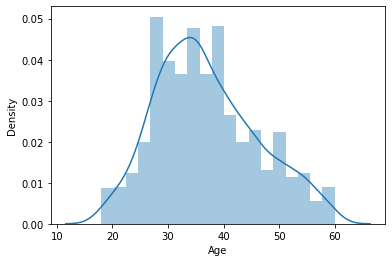

In [94]:
sns.distplot(df['Age'])

<AxesSubplot:xlabel='DailyRate', ylabel='Density'>

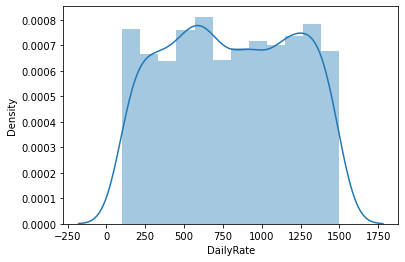

In [98]:
sns.distplot(df['DailyRate'])

<AxesSubplot:xlabel='Department', ylabel='Density'>

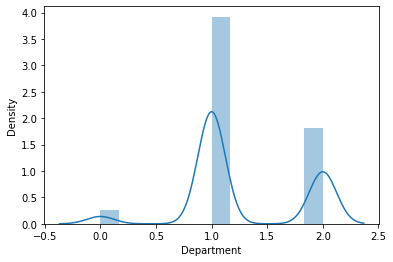

In [99]:
sns.distplot(df['Department'])

<AxesSubplot:xlabel='DistanceFromHome', ylabel='Density'>

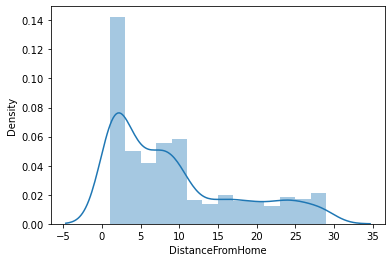

In [100]:
sns.distplot(df['DistanceFromHome'])

<AxesSubplot:xlabel='Education', ylabel='Density'>

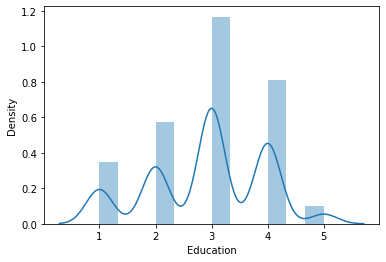

In [101]:
sns.distplot(df['Education'])

<AxesSubplot:xlabel='EducationField', ylabel='Density'>

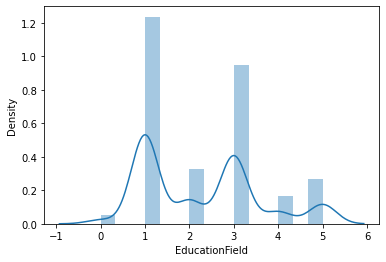

In [102]:
sns.distplot(df['EducationField'])

<AxesSubplot:xlabel='EmployeeCount', ylabel='Density'>

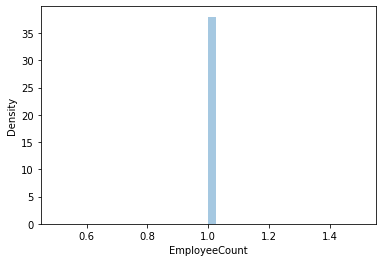

In [103]:
sns.distplot(df['EmployeeCount'])

<AxesSubplot:xlabel='EmployeeNumber', ylabel='Density'>

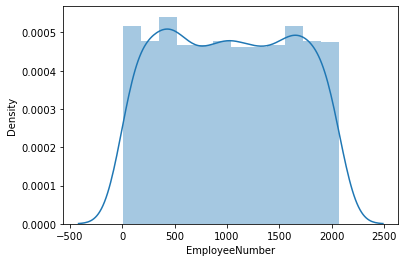

In [104]:
sns.distplot(df['EmployeeNumber'])

<AxesSubplot:xlabel='EnvironmentSatisfaction', ylabel='Density'>

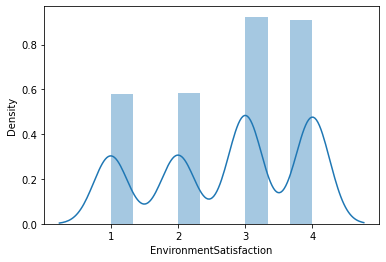

In [105]:
sns.distplot(df['EnvironmentSatisfaction'])

<AxesSubplot:xlabel='PerformanceRating', ylabel='Density'>

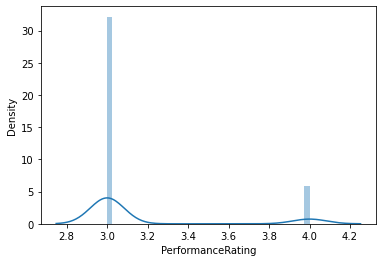

In [106]:
sns.distplot(df['PerformanceRating'])

<AxesSubplot:xlabel='WorkLifeBalance', ylabel='Density'>

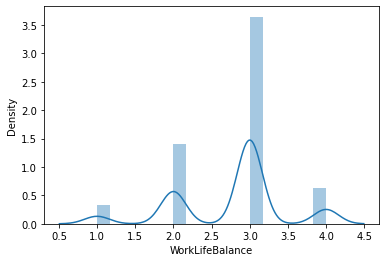

In [107]:
sns.distplot(df['WorkLifeBalance'])

<AxesSubplot:xlabel='YearsSinceLastPromotion', ylabel='Density'>

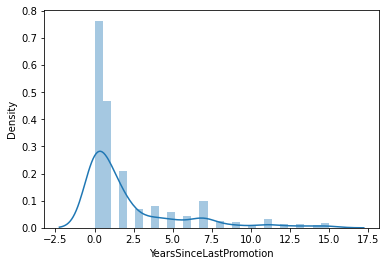

In [108]:
sns.distplot(df['YearsSinceLastPromotion'])

# Outliers

In [110]:
from scipy.stats import zscore
z = np.abs(zscore(df))
z

array([[0.4463504 , 2.28090588, 0.74252653, ..., 2.17198183, 2.49382042,
        0.67914568],
       [1.32236521, 0.4384223 , 1.2977746 , ..., 0.15570708, 0.33809616,
        0.36871529],
       [0.008343  , 2.28090588, 1.41436324, ..., 0.15570708, 0.33809616,
        0.67914568],
       ...,
       [1.08667552, 0.4384223 , 1.60518328, ..., 2.17198183, 0.33809616,
        0.67914568],
       [1.32236521, 0.4384223 , 0.54667746, ..., 0.15570708, 1.07786213,
        0.67914568],
       [0.32016256, 0.4384223 , 0.43256792, ..., 0.15570708, 1.75405446,
        0.36871529]])

In [111]:
threshold = 3
print(np.where(z>3))

(array([  45,   62,   64,  110,  123,  126,  178,  218,  237,  326,  386,
        425,  427,  535,  584,  595,  653,  701,  752,  799,  838,  861,
        875,  914,  922,  926,  937,  976, 1008, 1078, 1086, 1093, 1138,
       1156, 1221, 1223, 1242, 1295, 1301, 1303, 1331, 1414], dtype=int64), array([27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27,
       27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27,
       27, 27, 27, 27, 27, 27, 27, 27], dtype=int64))


In [112]:
df_new = df[(z<3).all(axis = 1)]
print(df.shape)
print(df_new.shape)

(1470, 28)
(0, 28)


# Divide Data in Feature & Vecture

In [113]:
x = df.drop(['Attrition'], axis = 1)
y = df['Attrition']

# Remove Skewness

In [115]:
x = power_transform(x, method = 'yeo-johnson')

In [117]:
sc = StandardScaler()
x = sc.fit_transform(x)
x

array([[ 0.52213976,  0.7592893 ,  1.37745428, ..., -2.57907316,
        -2.14444582, -1.09486169],
       [ 1.27641097, -1.33459724, -0.47212715, ...,  0.2173842 ,
         0.27682119,  0.09685415],
       [ 0.10209148,  1.34036452, -0.47212715, ...,  0.2173842 ,
         0.27682119, -1.09486169],
       ...,
       [-1.12375507, -1.75171312, -0.47212715, ..., -2.57907316,
         0.27682119, -1.09486169],
       [ 1.27641097,  0.58323545,  1.37745428, ...,  0.2173842 ,
        -1.10862441, -1.09486169],
       [-0.23618832, -0.35884464, -0.47212715, ...,  0.2173842 ,
         1.99817738,  0.09685415]])

# Model

In [119]:
lr = LogisticRegression()
for i in range(0,1000):
    x_train, x_test, y_train, y_test = train_test_split(x,y,random_state = i, test_size = 0.20)
    lr.fit(x_train, y_train)
    pred_train = lr.predict(x_train)
    pred_test = lr.predict(x_test)
    
    if round(accuracy_score(y_train, pred_train)*100,1) == round(accuracy_score(y_test, pred_test)*100,1):
        
        print("At random state", i, "The model performs very well")
        print("Random_state:-", i)
        
        print("Training r2_score is:-", accuracy_score(y_train, pred_train)*100)
        
        print("Testing r2_score is:-", accuracy_score(y_test, pred_test)*100)

At random state 131 The model performs very well
Random_state:- 131
Training r2_score is:- 87.07482993197279
Testing r2_score is:- 87.07482993197279
At random state 200 The model performs very well
Random_state:- 200
Training r2_score is:- 87.41496598639455
Testing r2_score is:- 87.41496598639455
At random state 307 The model performs very well
Random_state:- 307
Training r2_score is:- 87.07482993197279
Testing r2_score is:- 87.07482993197279
At random state 394 The model performs very well
Random_state:- 394
Training r2_score is:- 86.73469387755102
Testing r2_score is:- 86.73469387755102
At random state 451 The model performs very well
Random_state:- 451
Training r2_score is:- 86.73469387755102
Testing r2_score is:- 86.73469387755102
At random state 558 The model performs very well
Random_state:- 558
Training r2_score is:- 87.41496598639455
Testing r2_score is:- 87.41496598639455
At random state 581 The model performs very well
Random_state:- 581
Training r2_score is:- 87.074829931972

In [120]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.20, random_state = 200)

In [121]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       0.85      0.93      0.89       253
           1       0.05      0.02      0.03        41

    accuracy                           0.80       294
   macro avg       0.45      0.48      0.46       294
weighted avg       0.74      0.80      0.77       294



# Cross Validation Score

In [122]:
pred_lr = lr.predict(x_test)
from sklearn.model_selection import cross_val_score
lss = accuracy_score(y_test, pred_lr)
for j in range(2,10):
    lsscore = cross_val_score(lr,x,y,cv=j)
    lsc = lsscore.mean()
    
    print("At cv:-", j)
    print("Cross validation score is:-", lsc*100)
    print("accuracy_score is:-", lss*100)
    print("\n")

At cv:- 2
Cross validation score is:- 85.71428571428572
accuracy_score is:- 86.73469387755102


At cv:- 3
Cross validation score is:- 86.3265306122449
accuracy_score is:- 86.73469387755102


At cv:- 4
Cross validation score is:- 86.12186796588081
accuracy_score is:- 86.73469387755102


At cv:- 5
Cross validation score is:- 86.80272108843538
accuracy_score is:- 86.73469387755102


At cv:- 6
Cross validation score is:- 86.80272108843538
accuracy_score is:- 86.73469387755102


At cv:- 7
Cross validation score is:- 86.87074829931973
accuracy_score is:- 86.73469387755102


At cv:- 8
Cross validation score is:- 86.12237170349252
accuracy_score is:- 86.73469387755102


At cv:- 9
Cross validation score is:- 86.80025603937021
accuracy_score is:- 86.73469387755102




In [123]:
lsscore_selected = cross_val_score(lr,x,y,cv= 3).mean()
print("The cv score is: ", lsscore_selected, "\nThe accuracy score is: ", lss)

The cv score is:  0.8632653061224489 
The accuracy score is:  0.8673469387755102


# Naive Bayes Classification

In [125]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train, y_train)

GaussianNB()

In [126]:
predgnb = gnb.predict(x_test)
print(accuracy_score(predgnb, y_test))

0.8605442176870748


In [130]:
print(confusion_matrix(y_test, predgnb))
print(classification_report(y_test, predgnb))

[[241  12]
 [ 29  12]]
              precision    recall  f1-score   support

           0       0.89      0.95      0.92       253
           1       0.50      0.29      0.37        41

    accuracy                           0.86       294
   macro avg       0.70      0.62      0.65       294
weighted avg       0.84      0.86      0.84       294



# Support Vector Classification

In [131]:
from sklearn.svm import SVC
svc = SVC(kernel = 'rbf')
svc.fit(x_train, y_train)

SVC()

In [132]:
predsvc = svc.predict(x_test)
print('actual and predicted value score', accuracy_score(y_test, predsvc))

actual and predicted value score 0.8707482993197279


In [133]:
from sklearn.svm import SVC
svc = SVC(kernel = 'poly')
svc.fit(x_train, y_train)

SVC(kernel='poly')

In [134]:
predsvc = svc.predict(x_test)
print('actual and predicted value score', accuracy_score(y_test, predsvc))

actual and predicted value score 0.8775510204081632


In [135]:
from sklearn.svm import SVC
svc = SVC(kernel = 'linear')
svc.fit(x_train, y_train)

SVC(kernel='linear')

In [136]:
predsvc = svc.predict(x_test)
print('actual and predicted value score', accuracy_score(y_test, predsvc))

actual and predicted value score 0.8775510204081632


# KNN Classifier

In [137]:
from sklearn.neighbors import KNeighborsClassifier

In [139]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(x_train, y_train)
predknn = knn.predict(x_test)
predknn

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

In [140]:
print(confusion_matrix(y_test, predknn))

[[251   2]
 [ 35   6]]


In [141]:
print(classification_report(y_test, predknn))

              precision    recall  f1-score   support

           0       0.88      0.99      0.93       253
           1       0.75      0.15      0.24        41

    accuracy                           0.87       294
   macro avg       0.81      0.57      0.59       294
weighted avg       0.86      0.87      0.84       294



# Decision Tree Classifier

In [143]:
from sklearn.tree import DecisionTreeClassifier

In [144]:
dct = DecisionTreeClassifier()
dct.fit(x_train, y_train)
preddct = dct.predict(x_test)
preddct

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0])

In [145]:
print(classification_report(y_test, preddct))

              precision    recall  f1-score   support

           0       0.89      0.88      0.88       253
           1       0.30      0.32      0.31        41

    accuracy                           0.80       294
   macro avg       0.60      0.60      0.60       294
weighted avg       0.81      0.80      0.80       294



Best Performing Model is SVC

# AUC-ROC Curve

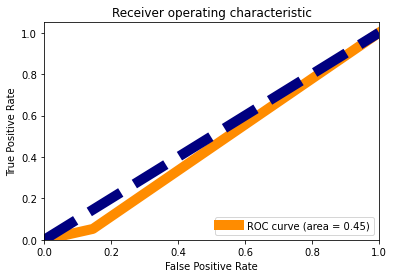

In [146]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(pred_test, y_test)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color = 'darkorange', lw = 10, label = 'ROC curve (area = %0.2f)' %roc_auc)
plt.plot([0,1],[0,1],color ='navy',lw=10,linestyle = '--')
plt.xlim([0.0,1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')

plt.legend(loc = "lower right")
plt.show()

# Model Saving:

In [147]:
import pickle
filename = 'HR_Attrition.pkl'
pickle.dump(lr, open(filename, 'wb'))

In [148]:
import numpy as np
a = np.array(y_test)
predicted = np.array(lr.predict(x_test))
df_com = pd.DataFrame({"original": a, "predicted": predicted}, index = range(len(a)))
df_com

,original,predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
289,0,0
290,0,0
291,0,0
292,0,0
